In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Cropyield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [4]:
south_indian_states={'Kerala','Tamil Nadu','Karnataka','Andhra Pradesh','Telangana','Puducherry'}
df2=df[df['State'].isin(south_indian_states)]
df2.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
27,Arecanut,1997,Whole Year,Karnataka,93100.0,133342.0,1266.7,8860327.00,28861.00,1.293571
28,Arhar/Tur,1997,Kharif,Karnataka,421810.0,98473.0,1266.7,40143657.70,130761.10,0.268235
29,Bajra,1997,Kharif,Karnataka,301149.0,132056.0,1266.7,28660350.33,93356.19,0.404545
30,Bajra,1997,Summer,Karnataka,820.0,662.0,1266.7,78039.40,254.20,0.810000
31,Black pepper,1997,Kharif,Karnataka,3825.0,924.0,1266.7,364025.25,1185.75,0.437500


In [5]:
df2.shape

(5121, 10)

In [6]:
df2.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,5121.000000,5.121000e+03,5.088000e+03,5115.000000,5.121000e+03,5121.000000,5073.000000
mean,2009.814099,1.335759e+05,5.861693e+07,1271.488256,1.789953e+07,35974.855349,194.425984
std,6.475962,3.057188e+05,5.143816e+08,610.947451,4.175083e+07,84949.498825,1398.827776
min,1997.000000,1.000000e+00,0.000000e+00,315.900000,9.817000e+01,0.090000,0.000000
25%,2004.000000,1.472000e+03,1.869500e+03,926.500000,2.081211e+05,405.520000,0.592000
50%,2011.000000,1.736500e+04,2.503150e+04,1111.700000,2.303190e+06,4485.960000,1.328750
75%,2015.000000,1.113880e+05,1.967888e+05,1349.500000,1.509581e+07,29891.610000,3.498214
max,2019.000000,3.003673e+06,6.326000e+09,3489.600000,4.853390e+08,948403.170000,21105.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5121 entries, 27 to 18576
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             5121 non-null   object 
 1   Crop_Year        5121 non-null   int64  
 2   Season           5121 non-null   object 
 3   State            5121 non-null   object 
 4   Area             5121 non-null   float64
 5   Production       5088 non-null   float64
 6   Annual_Rainfall  5115 non-null   float64
 7   Fertilizer       5121 non-null   float64
 8   Pesticide        5121 non-null   float64
 9   Yield            5073 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 440.1+ KB


In [8]:
df2.reset_index(drop=True, inplace=True)
df2.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Karnataka,93100.0,133342.0,1266.7,8860327.00,28861.00,1.293571
1,Arhar/Tur,1997,Kharif,Karnataka,421810.0,98473.0,1266.7,40143657.70,130761.10,0.268235
2,Bajra,1997,Kharif,Karnataka,301149.0,132056.0,1266.7,28660350.33,93356.19,0.404545
3,Bajra,1997,Summer,Karnataka,820.0,662.0,1266.7,78039.40,254.20,0.810000
4,Black pepper,1997,Kharif,Karnataka,3825.0,924.0,1266.7,364025.25,1185.75,0.437500


In [9]:
df2.isna().sum()

Crop                0
Crop_Year           0
Season              0
State               0
Area                0
Production         33
Annual_Rainfall     6
Fertilizer          0
Pesticide           0
Yield              48
dtype: int64

In [10]:
df2['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Summer     ', 'Rabi       ',
       'Autumn     ', 'Winter     '], dtype=object)

In [11]:
df2['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Bajra', 'Black pepper', 'Cardamom',
       'Coriander', 'Dry chillies', 'Garlic', 'Ginger', 'Groundnut',
       'Horse-gram', 'Jowar', 'Maize', 'Ragi', 'Rice', 'Sugarcane',
       'Turmeric', 'Wheat', 'Cashewnut', 'Coconut ', 'Tapioca',
       'Cotton(lint)', 'Onion', 'Sesamum', 'Small millets', 'Castor seed',
       'Gram', 'Linseed', 'Moong(Green Gram)', 'Niger seed',
       'Peas & beans (Pulses)', 'Potato', 'Rapeseed &Mustard',
       'Safflower', 'Soyabean', 'Sunflower', 'Banana', 'Sweet potato',
       'Tobacco', 'Other  Rabi pulses', 'Urad', 'Mesta',
       'Other Kharif pulses', 'Sannhamp', 'other oilseeds',
       'Other Cereals', 'Cowpea(Lobia)', 'Jute', 'Masoor',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses'], dtype=object)

In [12]:
df2['State'].unique()

array(['Karnataka', 'Kerala', 'Puducherry', 'Andhra Pradesh',
       'Tamil Nadu', 'Telangana'], dtype=object)

# **Data Preprocessing**

*   Null Value Handling



In [13]:
# Remove trailing spaces from all string values in the Data
df2 = df2.apply(lambda x: x.str.rstrip() if x.dtype == "object" else x)

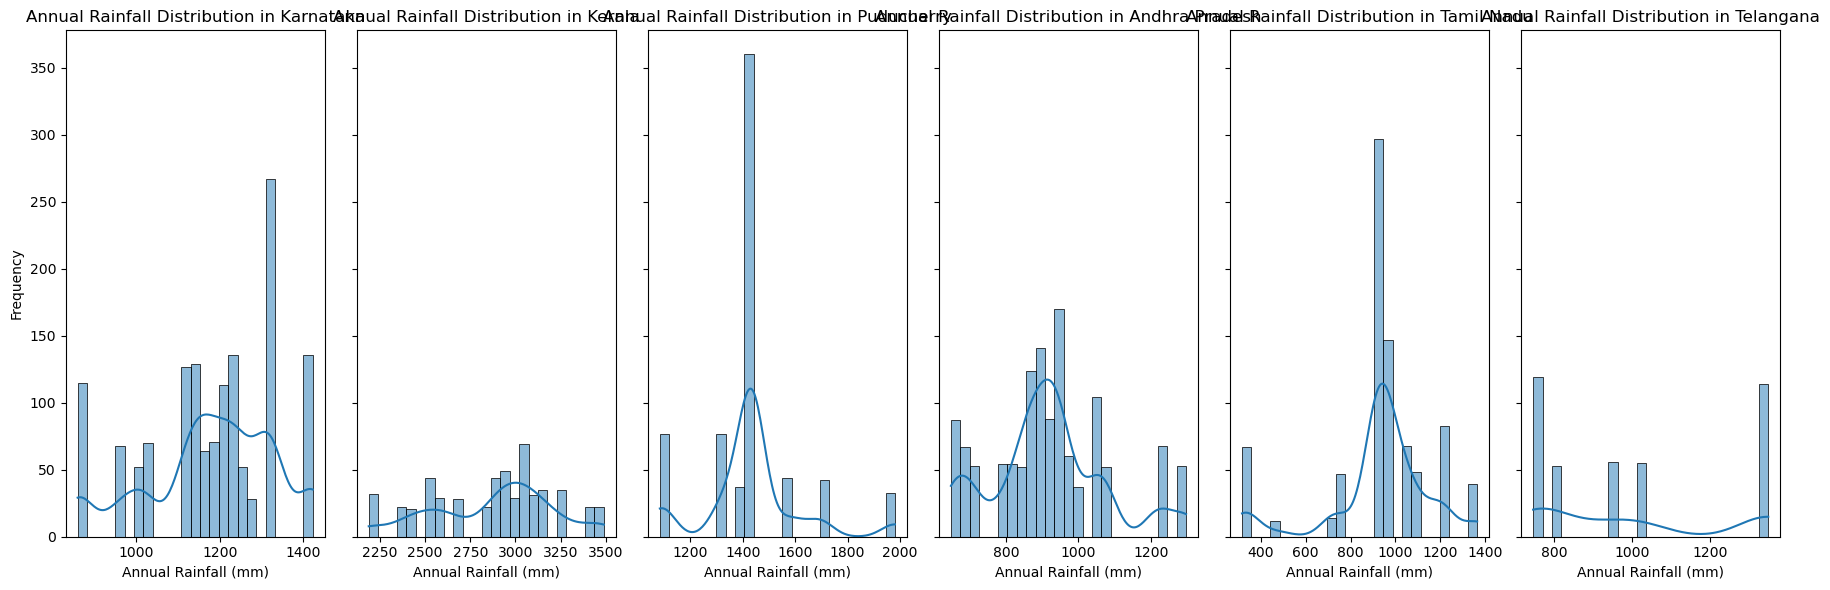

In [14]:
#checking for distribution
states=df2['State'].unique()

# Create a dictionary to store the data for each state
rainfall_data = {}

# Loop through each state and filter the data
for state in states:
    rainfall_data[state] = df2[df2['State'] == state]['Annual_Rainfall']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(states), figsize=(18, 6), sharey=True)

# Plot histograms for each state's data
for ax, state in zip(axes, states):
    sns.histplot(rainfall_data[state], kde=True, bins=25, ax=ax)
    ax.set_title(f'Annual Rainfall Distribution in {state}')
    ax.set_xlabel('Annual Rainfall (mm)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
# Filter the dataframe for rows where Annual_Rainfall is null
null_rainfall = df[df['Annual_Rainfall'].isnull()]

# Select the columns Crop_Year, State, and Season
null_rainfall_info = null_rainfall[['Crop','Crop_Year', 'State', 'Season','Production']]

# Print the filtered information
print(null_rainfall_info)

          Crop  Crop_Year           State       Season  Production
55    Turmeric       1997       Karnataka  Whole Year      24108.0
56       Wheat       1997       Karnataka  Rabi           118512.0
190      Bajra       1998       Karnataka  Rabi              536.0
191      Bajra       1998       Karnataka  Summer            498.0
1035     Jowar       2002  Andhra Pradesh  Rabi           350255.0
1036   Linseed       2002  Andhra Pradesh  Rabi             1238.0


In [16]:
#Filling the null values using the forward filling method
df2.loc[:,'Annual_Rainfall']=df2['Annual_Rainfall'].ffill()

In [17]:
#Checking for null values in all the columns
df2.isnull().sum()

Crop                0
Crop_Year           0
Season              0
State               0
Area                0
Production         33
Annual_Rainfall     0
Fertilizer          0
Pesticide           0
Yield              48
dtype: int64

In [20]:
df2.head(60)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Karnataka,93100.0,1.333420e+05,1266.7000,8.860327e+06,28861.00,1.293571
1,Arhar/Tur,1997,Kharif,Karnataka,421810.0,9.847300e+04,1266.7000,4.014366e+07,130761.10,0.268235
2,Bajra,1997,Kharif,Karnataka,301149.0,1.320560e+05,1266.7000,2.866035e+07,93356.19,0.404545
3,Bajra,1997,Summer,Karnataka,820.0,6.620000e+02,1266.7000,7.803940e+04,254.20,0.810000
4,Black pepper,1997,Kharif,Karnataka,3825.0,9.240000e+02,1266.7000,3.640252e+05,1185.75,0.437500
5,Cardamom,1997,Whole Year,Karnataka,21230.0,1.214000e+03,1266.7000,2.020459e+06,6581.30,0.058571
6,Coriander,1997,Whole Year,Karnataka,17317.0,2.853000e+03,1266.7000,1.648059e+06,5368.27,0.121333
7,Dry chillies,1997,Kharif,Karnataka,186579.0,1.392060e+05,1266.7000,1.775672e+07,57839.49,1.078333
8,Dry chillies,1997,Rabi,Karnataka,4565.0,7.895000e+03,1266.7000,4.344510e+05,1415.15,1.869444
9,Garlic,1997,Whole Year,Karnataka,5061.0,3.799000e+03,1266.7000,4.816554e+05,1568.91,1.585000


In [18]:
#Jute Production in Tamilnadu
df3=df2[df2['Crop']=='Jute']
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2203,Jute,2011,Kharif,Tamil Nadu,3.0,0.0,926.5,502.56,0.99,NaN


Jute entry in the dataset is only at one place.And also the noted Yield value is also Null. Drop the entry is preferable here.

In [20]:
# Drop Jute Entry
df2= df2.drop(df2[df2['Crop'] == 'Jute'].index)
df2['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Bajra', 'Black pepper', 'Cardamom',
       'Coriander', 'Dry chillies', 'Garlic', 'Ginger', 'Groundnut',
       'Horse-gram', 'Jowar', 'Maize', 'Ragi', 'Rice', 'Sugarcane',
       'Turmeric', 'Wheat', 'Cashewnut', 'Coconut', 'Tapioca',
       'Cotton(lint)', 'Onion', 'Sesamum', 'Small millets', 'Castor seed',
       'Gram', 'Linseed', 'Moong(Green Gram)', 'Niger seed',
       'Peas & beans (Pulses)', 'Potato', 'Rapeseed &Mustard',
       'Safflower', 'Soyabean', 'Sunflower', 'Banana', 'Sweet potato',
       'Tobacco', 'Other  Rabi pulses', 'Urad', 'Mesta',
       'Other Kharif pulses', 'Sannhamp', 'other oilseeds',
       'Other Cereals', 'Cowpea(Lobia)', 'Masoor', 'Oilseeds total',
       'Guar seed', 'Other Summer Pulses'], dtype=object)

In [21]:
#Cashewnut production in Tamilnadu
df3=df2[(df2['State']=='Tamil Nadu') & (df2['Crop']=='Cashewnut')&((df2['Annual_Rainfall'] >= 900) & (df2['Annual_Rainfall'] <= 1000))&(df2['Season']=='Whole Year')&((df2['Area'] > 80000) & (df2['Area'] <90000))]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2766,Cashewnut,2014,Whole Year,Tamil Nadu,89021.0,36561.0,911.3,13438610.16,29376.93,0.468571
3268,Cashewnut,2016,Whole Year,Tamil Nadu,86280.0,10178.0,912.4,13222410.00,30198.00,0.168571
3527,Cashewnut,2017,Whole Year,Tamil Nadu,85883.0,NaN,970.9,13521419.52,32635.54,NaN
3790,Cashewnut,2018,Whole Year,Tamil Nadu,85272.0,19701.0,986.2,13831118.40,29845.20,0.242000
4057,Cashewnut,2019,Whole Year,Tamil Nadu,83977.0,25687.0,910.1,14423889.52,31071.49,0.335172
4306,Cashewnut,2000,Whole Year,Tamil Nadu,88123.0,20348.0,971.1,8651034.91,22911.98,0.304783


In [22]:
#Applied Backward Filling
df3.loc[:,'Production'] = df3['Production'].bfill()
df2.update(df3)

In [23]:
#Maize Production in Tamilnadu
df3=df2[(df2['State']=='Tamil Nadu') & (df2['Crop']=='Maize')&(df2['Annual_Rainfall']>=1000)&(df2['Season']=='Kharif')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
859,Maize,2004,Kharif,Tamil Nadu,189893.0,294717.0,1034.0,20573007.62,39877.53,1.758846
1035,Maize,2005,Kharif,Tamil Nadu,202830.0,0.0,1364.1,24323373.60,42594.30,NaN
3028,Maize,2015,Kharif,Tamil Nadu,201750.0,1483163.0,1201.9,31858342.50,66577.50,7.782000
4194,Maize,1998,Kharif,Tamil Nadu,70179.0,111983.0,1077.1,6933685.20,20351.91,1.606667
4502,Maize,2010,Kharif,Tamil Nadu,230489.0,1027536.0,1095.2,38286527.79,55317.36,4.527857


In [24]:
df3.loc[df3['Production'] == 0, 'Production'] =pd.NA
df3.loc[:,'Production'] = df3['Production'].bfill()
# Apply df3 modifications back to df2
df2.update(df3)

In [25]:
#Arecanut Production in Tamilnadu
df3=df2[(df2['State']=='Tamil Nadu') & (df2['Crop']=='Arecanut')]
df3


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
544,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0.0,315.9,469184.52,1239.00,0.000000
729,Arecanut,2003,Whole Year,Tamil Nadu,5219.0,0.0,345.6,516576.62,1252.56,NaN
842,Arecanut,2004,Whole Year,Tamil Nadu,5077.0,7390.0,1034.0,550042.18,1066.17,1.550000
1017,Arecanut,2005,Whole Year,Tamil Nadu,4773.0,9198.0,1364.1,572378.16,1002.33,1.212727
1207,Arecanut,2006,Whole Year,Tamil Nadu,5526.0,11904.0,927.9,705725.46,1215.72,1.603636
1363,Arecanut,2007,Whole Year,Tamil Nadu,5553.0,11739.0,1067.2,740770.20,888.48,2.057391
1575,Arecanut,2008,Whole Year,Tamil Nadu,5612.0,11061.0,1201.9,802740.48,505.08,1.708333
1790,Arecanut,2009,Whole Year,Tamil Nadu,5456.0,10437.0,928.5,850153.92,927.52,1.605000
2181,Arecanut,2011,Whole Year,Tamil Nadu,6509.0,15948.0,926.5,1090387.68,2147.97,2.054583
2547,Arecanut,2013,Whole Year,Tamil Nadu,6695.0,8619.0,740.9,967360.55,1807.65,1.220000


In [26]:
df3.loc[df3['Production'] == 0, 'Production'] =pd.NA
df3.loc[:,'Production'] = df3['Production'].bfill()

# Apply df3 modifications back to df2
df2.update(df3)

In [27]:
#Sweet potato production in Puducherry
df3=df2[(df2['State']=='Puducherry') & (df2['Crop']=='Sweet potato')]
df3.loc[df3['Production'] == 0, 'Production'] =pd.NA
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
1270,Sweet potato,2007,Rabi,Puducherry,1.0,1.0,1434.5875,133.40,0.16,1.00
1430,Sweet potato,2008,Rabi,Puducherry,1.0,1.0,1434.5875,143.04,0.09,1.00
1642,Sweet potato,2009,Kharif,Puducherry,1.0,NaN,1434.5875,155.82,0.17,0.00
1856,Sweet potato,2010,Kharif,Puducherry,1.0,8.0,1434.5875,166.11,0.24,8.00
2899,Sweet potato,2015,Kharif,Puducherry,5.0,73.0,1980.6000,789.55,1.65,14.60
2900,Sweet potato,2015,Rabi,Puducherry,3.0,34.0,1980.6000,473.73,0.99,11.33
3156,Sweet potato,2016,Kharif,Puducherry,6.0,60.0,1391.3000,919.50,2.10,10.00
3414,Sweet potato,2017,Kharif,Puducherry,7.0,35.0,1582.4000,1102.08,2.66,5.00
3415,Sweet potato,2017,Rabi,Puducherry,1.0,8.0,1582.4000,157.44,0.38,8.00
3679,Sweet potato,2018,Kharif,Puducherry,3.0,24.0,1693.9000,486.60,1.05,8.00


In [28]:
#Applied Forward filling by consider the facters Area,rainfall fertilizer and pesticide
df3.loc[:,'Production'] = df3['Production'].ffill()

# Apply df3 modifications back to df2
df2.update(df3)


In [29]:
#Turmeric Production in Puducherry
df3=df2[(df2['State']=='Puducherry') & (df2['Crop']=='Turmeric')]
df3.loc[df3['Production'] == 0, 'Production'] =pd.NA
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
1273,Turmeric,2007,Rabi,Puducherry,4.0,6.0,1434.5875,533.60,0.64,1.50
1433,Turmeric,2008,Rabi,Puducherry,3.0,5.0,1434.5875,429.12,0.27,1.67
1645,Turmeric,2009,Kharif,Puducherry,3.0,NaN,1434.5875,467.46,0.51,0.00
1646,Turmeric,2009,Rabi,Puducherry,3.0,5.0,1434.5875,467.46,0.51,1.67
1859,Turmeric,2010,Kharif,Puducherry,4.0,6.0,1434.5875,664.44,0.96,1.50
2032,Turmeric,2011,Kharif,Puducherry,2.0,3.0,1434.5875,335.04,0.66,1.50
2033,Turmeric,2011,Rabi,Puducherry,4.0,6.0,1434.5875,670.08,1.32,1.50
2903,Turmeric,2015,Kharif,Puducherry,2.0,4.0,1980.6000,315.82,0.66,2.00
3159,Turmeric,2016,Kharif,Puducherry,6.0,18.0,1391.3000,919.50,2.10,3.00
3418,Turmeric,2017,Kharif,Puducherry,8.0,24.0,1582.4000,1259.52,3.04,3.00


In [30]:
#Applied Forward filling by consider the facters Area,rainfall fertilizer and pesticide
df3.loc[:,'Production'] = df3['Production'].ffill()

# Apply df3 modifications back to df2
df2.update(df3)

In [31]:
#Horse gram in Telengana
df3=df2[(df2['State']=='Telangana') & (df2['Crop']=='Horse-gram')&(df2['Season']=='Kharif')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4545,Horse-gram,2013,Kharif,Telangana,507.0,315.0,1348.7,73256.43,136.89,0.610000
4603,Horse-gram,2014,Kharif,Telangana,529.0,274.0,746.4,79857.84,174.57,0.510000
4665,Horse-gram,2015,Kharif,Telangana,510.0,110.0,747.9,80534.10,168.30,0.220000
4724,Horse-gram,2016,Kharif,Telangana,353.0,135.0,942.6,54097.25,123.55,0.395714
4780,Horse-gram,2017,Kharif,Telangana,237.0,NaN,815.7,37313.28,90.06,NaN
4833,Horse-gram,2018,Kharif,Telangana,144.0,92.0,1350.3,23356.80,50.40,0.654000
4886,Horse-gram,2019,Kharif,Telangana,431.0,371.0,1031.7,74028.56,159.47,0.818333


In [32]:
#Applied Forward filling by consider the facters Area,rainfall fertilizer and pesticide
df3.loc[:,'Production'] = df3['Production'].bfill()
# Apply df3 modifications back to df2
df2.update(df3)


In [33]:
df3=df2[(df2['State']=='Telangana') & (df2['Crop']=='Horse-gram')&(df2['Season']=='Rabi')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4546,Horse-gram,2013,Rabi,Telangana,2437.0,1165.0,1348.7,352122.13,657.99,0.481429
4604,Horse-gram,2014,Rabi,Telangana,1778.0,679.0,746.4,268406.88,586.74,0.393750
4666,Horse-gram,2015,Rabi,Telangana,1530.0,684.0,747.9,241602.30,504.90,0.418889
4725,Horse-gram,2016,Rabi,Telangana,1310.0,500.0,942.6,200757.50,458.50,0.360625
4781,Horse-gram,2017,Rabi,Telangana,963.0,NaN,815.7,151614.72,365.94,NaN
4834,Horse-gram,2018,Rabi,Telangana,736.0,467.0,1350.3,119379.20,257.60,0.668571
4887,Horse-gram,2019,Rabi,Telangana,619.0,539.0,1031.7,106319.44,229.03,0.870526


In [34]:
#Applied Forward filling by consider the facters Area,rainfall fertilizer and pesticide
df3.loc[:,'Production'] = df3['Production'].bfill()
# Apply df3 modifications back to df2
df2.update(df3)


In [35]:
df3=df2[(df2['State']=='Telangana') & (df2['Crop']=='Potato')&(df2['Season']=='Kharif')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4619,Potato,2014,Kharif,Telangana,9.0,173.0,746.4,1358.64,2.97,19.220
4734,Potato,2016,Kharif,Telangana,37.0,405.0,942.6,5670.25,12.95,10.795
4790,Potato,2017,Kharif,Telangana,19.0,163.0,815.7,2991.36,7.22,7.940
4843,Potato,2018,Kharif,Telangana,8.0,24.0,1350.3,1297.60,2.80,3.000
4896,Potato,2019,Kharif,Telangana,3.0,NaN,1031.7,515.28,1.11,NaN


consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =area*3

In [36]:
#consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =area*3
df3.loc[:,'Production'] = df3['Production'].fillna(9)
# Apply df3 modifications back to df2
df2.update(df3)


In [37]:
#Safflower Production Telangana
df3=df2[(df2['State']=='Telangana') & (df2['Crop']=='Safflower')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4567,Safflower,2013,Rabi,Telangana,7867.0,5573.0,1348.7,1136702.83,2124.09,0.750000
4626,Safflower,2014,Rabi,Telangana,4155.0,3100.0,746.4,627238.80,1371.15,0.752000
4685,Safflower,2015,Rabi,Telangana,3855.0,2581.0,747.9,608743.05,1272.15,0.806000
4740,Safflower,2016,Kharif,Telangana,5.0,5.0,942.6,766.25,1.75,1.000000
4741,Safflower,2016,Rabi,Telangana,4364.0,2892.0,942.6,668783.00,1527.40,0.731111
4796,Safflower,2017,Rabi,Telangana,3862.0,2189.0,815.7,608033.28,1467.56,0.606250
4849,Safflower,2018,Rabi,Telangana,2552.0,1543.0,1350.3,413934.40,893.20,0.749000
4902,Safflower,2019,Kharif,Telangana,1.0,NaN,1031.7,171.76,0.37,NaN
4903,Safflower,2019,Rabi,Telangana,1584.0,1750.0,1031.7,272067.84,586.08,1.106364


consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =1

In [38]:
#consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =1
df3.loc[:,'Production'] = df3['Production'].fillna(1)
# Apply df3 modifications back to df2
df2.update(df3)

In [39]:
#Wheat Production Telangana
df3=df2[(df2['State']=='Telangana') & (df2['Crop']=='Wheat')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4582,Wheat,2013,Rabi,Telangana,7039.0,4366.0,1348.7,1017065.11,1900.53,0.740000
4642,Wheat,2014,Rabi,Telangana,5828.0,6929.0,746.4,879794.88,1923.24,1.156000
4701,Wheat,2015,Rabi,Telangana,4952.0,16902.0,747.9,781970.32,1634.16,2.947500
4758,Wheat,2016,Rabi,Telangana,5409.0,7413.0,942.6,828929.25,1893.15,1.223571
4810,Wheat,2017,Kharif,Telangana,2.0,2.0,815.7,314.88,0.76,1.000000
4811,Wheat,2017,Rabi,Telangana,4156.0,5771.0,815.7,654320.64,1579.28,1.429000
4865,Wheat,2018,Rabi,Telangana,4844.0,9093.0,1350.3,785696.80,1695.40,1.807000
4919,Wheat,2019,Kharif,Telangana,1.0,NaN,1031.7,171.76,0.37,NaN
4920,Wheat,2019,Rabi,Telangana,4471.0,8237.0,1031.7,767938.96,1654.27,1.798462


consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =1

In [40]:
#consider Area ,rainfall, fertilizer and pesticide used in previous year in the Kharif season set production =1
df3.loc[:,'Production'] = df3['Production'].fillna(1)
# Apply df3 modifications back to df2
df2.update(df3)

In [41]:
#Mesta Production in Karnataka
df3=df2[(df2['State']=='Karnataka') & (df2['Crop']=='Mesta')&(df2['Season']=='Whole Year')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
957,Mesta,2005,Whole Year,Karnataka,2097.0,2662.0,1316.200000,251472.24,440.37,1.568000
1154,Mesta,2006,Whole Year,Karnataka,1998.0,2667.0,1146.300000,255164.58,439.56,1.543333
1306,Mesta,2007,Whole Year,Karnataka,1861.0,2387.0,1323.300000,248257.40,297.76,1.554000
1519,Mesta,2008,Whole Year,Karnataka,1146.0,1617.0,1164.100000,163923.84,103.14,1.636000
1733,Mesta,2009,Whole Year,Karnataka,1300.0,1885.0,1321.000000,202566.00,221.00,1.324000
1949,Mesta,2010,Whole Year,Karnataka,1907.0,2405.0,1317.700000,316771.77,457.68,1.210000
2127,Mesta,2011,Whole Year,Karnataka,825.0,1028.0,1178.986364,138204.00,272.25,1.202857
2315,Mesta,2012,Whole Year,Karnataka,713.0,871.0,956.200000,107520.40,221.03,1.242000
2482,Mesta,2013,Whole Year,Karnataka,349.0,466.0,1235.600000,50427.01,94.23,1.330000
2694,Mesta,2014,Whole Year,Karnataka,261.0,293.0,1238.500000,39400.56,86.13,1.123333


In [42]:
#By Analising the data find that production is approximatly 125% of Area and Filled the Null values in production accordingly
df3=df3[df3['Production'].isnull()]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3455,Mesta,2017,Whole Year,Karnataka,9.0,NaN,1111.7,1416.96,3.42,NaN
3981,Mesta,2019,Whole Year,Karnataka,55.0,NaN,1422.3,9446.80,20.35,NaN


In [43]:
df3.loc[:,'Production'] = df3['Production'].fillna(df3['Area']*1.25)
# Apply df3 modifications back to df2
df2.update(df3)

In [44]:
#Kerala (Onion,Horse gram,Moong, Urad,Cowpea)Production
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Onion')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2365,Onion,2012,Whole Year,Kerala,40.00,0.0,2187.6,6032.000,12.4000,NaN
2532,Onion,2013,Whole Year,Kerala,103.00,NaN,3255.4,14882.470,27.8100,NaN
2744,Onion,2014,Whole Year,Kerala,61.00,NaN,3046.4,9208.560,20.1300,NaN
2990,Onion,2015,Whole Year,Kerala,27.00,NaN,2602.9,4263.570,8.9100,NaN
3246,Onion,2016,Whole Year,Kerala,31.00,NaN,2924.3,4750.750,10.8500,NaN
3505,Onion,2017,Whole Year,Kerala,9.00,NaN,2664.8,1416.960,3.4200,NaN
3768,Onion,2018,Whole Year,Kerala,5.21,NaN,2989.7,845.062,1.8235,NaN


In [45]:
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Cowpea(Lobia)')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2357,Cowpea(Lobia),2012,Whole Year,Kerala,1085.0,0.0,2187.6,163618.00,336.35,NaN
2524,Cowpea(Lobia),2013,Whole Year,Kerala,775.0,NaN,3255.4,111979.75,209.25,NaN
2736,Cowpea(Lobia),2014,Whole Year,Kerala,1004.0,NaN,3046.4,151563.84,331.32,NaN


In [46]:
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Horse-gram')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2361,Horse-gram,2012,Whole Year,Kerala,105.0,0.0,2187.6,15834.00,32.55,NaN
2528,Horse-gram,2013,Whole Year,Kerala,69.0,NaN,3255.4,9969.81,18.63,NaN
2740,Horse-gram,2014,Whole Year,Kerala,111.0,NaN,3046.4,16756.56,36.63,NaN


In [47]:
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Moong(Green Gram)')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2364,Moong(Green Gram),2012,Whole Year,Kerala,101.0,0.0,2187.6,15230.80,31.31,NaN
2531,Moong(Green Gram),2013,Whole Year,Kerala,121.0,NaN,3255.4,17483.29,32.67,NaN
2743,Moong(Green Gram),2014,Whole Year,Kerala,163.0,NaN,3046.4,24606.48,53.79,NaN


In [48]:
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Urad')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2380,Urad,2012,Whole Year,Kerala,265.0,0.0,2187.6,39962.00,82.15,NaN
2546,Urad,2013,Whole Year,Kerala,374.0,NaN,3255.4,54039.26,100.98,NaN
2758,Urad,2014,Whole Year,Kerala,403.0,NaN,3046.4,60836.88,132.99,NaN


In [49]:
df3=df2[df2['State']=='Kerala']
df3=df3['Production'].fillna(0)
# Apply df3 modifications back to df2
df2.update(df3)

As the data of the Onion production in kerala is noted as 0 in the 2012 significant production is not happening at kerala.Therefore we filled it with 0 in all columns. The yield value is also null.Same trend is visible in the cases of Cowpea,Horse gram,Moong and Urad. filled it with 0 in all the cases.

In [50]:
#Wheat production in Kerala
df3=df2[(df2['State']=='Kerala') & (df2['Crop']=='Wheat')]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2381,Wheat,2012,Whole Year,Kerala,1.0,0.0,2187.6,150.80,0.31,NaN
2759,Wheat,2014,Whole Year,Kerala,1.0,3.0,3046.4,150.96,0.33,3.00
3005,Wheat,2015,Whole Year,Kerala,2.0,3.0,2602.9,315.82,0.66,1.50
3260,Wheat,2016,Whole Year,Kerala,1.0,1.0,2924.3,153.25,0.35,1.00
3519,Wheat,2017,Whole Year,Kerala,1.0,1.0,2664.8,157.44,0.38,1.00
3782,Wheat,2018,Whole Year,Kerala,1.4,2.0,2989.7,227.08,0.49,1.45
4048,Wheat,2019,Whole Year,Kerala,1.0,2.0,3119.2,171.76,0.37,2.00


In [51]:
#consider Area ,rainfall, fertilizer and pesticide used inthe data production =1
df3.loc[:,'Production'] = df3['Production'].fillna(1)
# Apply df3 modifications back to df2
df2.update(df3)

In [52]:
df3= df2[df2['Production'].isnull()]
df3

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2429,Sannhamp,2013,Whole Year,Andhra Pradesh,4734.0,NaN,1062.3,684015.66,1278.18,NaN
2654,Tapioca,2014,Rabi,Andhra Pradesh,49.0,NaN,687.6,7397.04,16.17,NaN
3329,Gram,2017,Kharif,Andhra Pradesh,1.0,NaN,868.2,157.44,0.38,NaN
3602,Linseed,2018,Kharif,Andhra Pradesh,151.0,NaN,1220.5,24492.20,52.85,NaN
3861,Guar seed,2019,Kharif,Andhra Pradesh,1.0,NaN,899.2,171.76,0.37,NaN
3862,Guar seed,2019,Rabi,Andhra Pradesh,6.0,NaN,899.2,1030.56,2.22,NaN
3867,Linseed,2019,Kharif,Andhra Pradesh,133.0,NaN,899.2,22844.08,49.21,NaN
3888,Sannhamp,2019,Kharif,Andhra Pradesh,3365.0,NaN,899.2,577972.40,1245.05,NaN
3889,Sannhamp,2019,Rabi,Andhra Pradesh,1133.0,NaN,899.2,194604.08,419.21,NaN
4417,Garlic,2004,Whole Year,Andhra Pradesh,552.0,NaN,781.8,59803.68,115.92,NaN


In [53]:
#Tapioca Andhra Pradesh
# Filter the DataFrame for Andhra Pradesh and Tapioca
df2_ap_tapioca = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Tapioca')]
df2_ap_tapioca


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
217,Tapioca,2000,Whole Year,Andhra Pradesh,21506.0,166124.0,935.6,2111244.02,5591.56,7.528000
371,Tapioca,2001,Whole Year,Andhra Pradesh,17694.0,146361.0,928.4,1807088.22,4600.44,7.830000
516,Tapioca,2002,Whole Year,Andhra Pradesh,13138.0,79474.0,648.1,1243774.46,3284.50,5.034286
625,Tapioca,2003,Whole Year,Andhra Pradesh,19456.0,122145.0,826.0,1925754.88,4669.44,6.290000
923,Tapioca,2005,Whole Year,Andhra Pradesh,15281.0,125986.0,1075.5,1832497.52,3209.01,7.207500
1121,Tapioca,2006,Whole Year,Andhra Pradesh,19732.0,209152.0,845.2,2519973.72,4341.04,8.950000
1484,Tapioca,2008,Whole Year,Andhra Pradesh,16765.0,208052.0,944.6,2398065.60,1508.85,9.871429
1698,Tapioca,2009,Whole Year,Andhra Pradesh,11234.0,146366.0,711.0,1750481.88,1909.78,9.916667
1911,Tapioca,2010,Whole Year,Andhra Pradesh,12859.0,84686.0,1297.0,2136008.49,3086.16,6.107500
2087,Tapioca,2011,Whole Year,Andhra Pradesh,12793.0,127953.0,861.9,2143083.36,4221.69,9.755000


In [54]:
# Filter the DataFrame for Andhra Pradesh and Tapioca for rabi season
df2_ap_tapi_rabi = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Tapioca')& (df2['Season'] == 'Rabi')]
df2_ap_tapi_rabi

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2442,Tapioca,2013,Rabi,Andhra Pradesh,20.0,368.0,1062.3,2889.80,5.40,18.4000
2654,Tapioca,2014,Rabi,Andhra Pradesh,49.0,NaN,687.6,7397.04,16.17,NaN
2868,Tapioca,2015,Rabi,Andhra Pradesh,61.0,763.0,940.7,9632.51,20.13,11.0600
3119,Tapioca,2016,Rabi,Andhra Pradesh,19.0,189.0,890.0,2911.75,6.65,10.0875
3370,Tapioca,2017,Rabi,Andhra Pradesh,39.0,474.0,868.2,6140.16,14.82,9.5300
3637,Tapioca,2018,Rabi,Andhra Pradesh,83.0,743.0,1220.5,13462.60,29.05,11.4425
3902,Tapioca,2019,Rabi,Andhra Pradesh,54.0,512.0,899.2,9275.04,19.98,14.4150


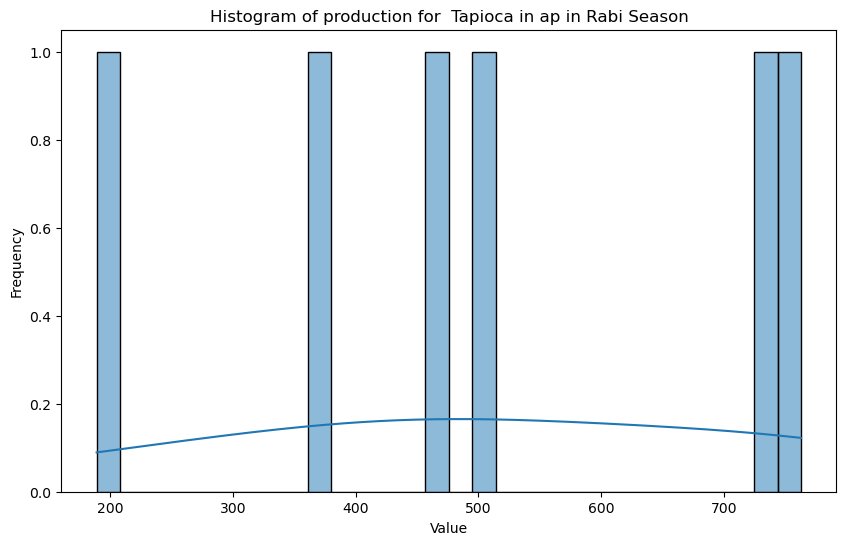

In [55]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df2_ap_tapi_rabi['Production'], kde=True,bins=30, edgecolor='black')
plt.title('Histogram of production for  Tapioca in ap in Rabi Season')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [56]:
median_prod = df2_ap_tapi_rabi['Production'].median()
median_prod

493.0

In [57]:
# Fill NA values in the 'Production' column with the calculated mean
df2_ap_tapi_rabi['Production'].fillna(median_prod, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14348\2902431731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ap_tapi_rabi['Production'].fillna(median_prod, inplace=True)


In [58]:
df2.loc[df2_ap_tapi_rabi.index, 'Production'] = df2_ap_tapi_rabi['Production']

In [59]:
# Filter the DataFrame for Sanhamp in ap
df2_ap_san = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Sannhamp')]
df2_ap_san

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2429,Sannhamp,2013,Whole Year,Andhra Pradesh,4734.0,NaN,1062.3,684015.66,1278.18,NaN
3888,Sannhamp,2019,Kharif,Andhra Pradesh,3365.0,NaN,899.2,577972.40,1245.05,NaN
3889,Sannhamp,2019,Rabi,Andhra Pradesh,1133.0,NaN,899.2,194604.08,419.21,NaN


In [60]:
#fill production of sanhamp in ap with 0 as production sanhamp in ap not available and very less in other states
df2_ap_san['Production'].fillna(0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14348\3825803841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ap_san['Production'].fillna(0, inplace=True)


In [61]:
df2.loc[df2_ap_san.index, 'Production'] = df2_ap_san['Production']

In [62]:
# Filter the DataFrame for  gram in Andhra Pradesh
df2_ap_gram = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Gram')]
df2_ap_gram

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
184,Gram,2000,Kharif,Andhra Pradesh,100.0,173.0,935.6,9.817000e+03,26.00,1.157500
185,Gram,2000,Rabi,Andhra Pradesh,200763.0,228546.0,935.6,1.970890e+07,52198.38,1.414500
338,Gram,2001,Kharif,Andhra Pradesh,91.0,101.0,928.4,9.293830e+03,23.66,1.092857
339,Gram,2001,Rabi,Andhra Pradesh,285086.0,363033.0,928.4,2.911583e+07,74122.36,1.419000
482,Gram,2002,Kharif,Andhra Pradesh,37.0,45.0,648.1,3.502790e+03,9.25,1.007500
483,Gram,2002,Rabi,Andhra Pradesh,390113.0,381761.0,648.1,3.693200e+07,97528.25,1.162381
591,Gram,2003,Kharif,Andhra Pradesh,52.0,90.0,826.0,5.146960e+03,12.48,1.656667
592,Gram,2003,Rabi,Andhra Pradesh,422059.0,456464.0,826.0,4.177540e+07,101294.16,1.338947
890,Gram,2005,Rabi,Andhra Pradesh,394443.0,626974.0,1075.5,4.730160e+07,82833.03,1.602632
1088,Gram,2006,Rabi,Andhra Pradesh,601745.0,653429.0,845.2,7.684885e+07,132383.90,1.465000


In [63]:
# Filter the DataFrame for  gram in Andhra Pradesh in kharif season
df2_ap_gram_kharif = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Gram')& (df2['Season'] == 'Kharif')]
df2_ap_gram_kharif

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
184,Gram,2000,Kharif,Andhra Pradesh,100.0,173.0,935.6,9817.00,26.00,1.157500
338,Gram,2001,Kharif,Andhra Pradesh,91.0,101.0,928.4,9293.83,23.66,1.092857
482,Gram,2002,Kharif,Andhra Pradesh,37.0,45.0,648.1,3502.79,9.25,1.007500
591,Gram,2003,Kharif,Andhra Pradesh,52.0,90.0,826.0,5146.96,12.48,1.656667
2828,Gram,2015,Kharif,Andhra Pradesh,2.0,2.0,940.7,315.82,0.66,1.000000
3075,Gram,2016,Kharif,Andhra Pradesh,5.0,2.0,890.0,766.25,1.75,0.400000
3329,Gram,2017,Kharif,Andhra Pradesh,1.0,NaN,868.2,157.44,0.38,NaN
3594,Gram,2018,Kharif,Andhra Pradesh,31.0,5.0,1220.5,5028.20,10.85,0.500000
4149,Gram,1998,Kharif,Andhra Pradesh,100.0,100.0,1048.3,9880.00,29.00,1.000000
4419,Gram,2004,Kharif,Andhra Pradesh,111.0,98.0,781.8,12025.74,23.31,0.885000


In [64]:
#sorting wrt year
df2_ap_gram_kharif = df2_ap_gram_kharif.sort_values(by='Crop_Year')
df2_ap_gram_kharif

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4149,Gram,1998,Kharif,Andhra Pradesh,100.0,100.0,1048.3,9880.00,29.00,1.000000
184,Gram,2000,Kharif,Andhra Pradesh,100.0,173.0,935.6,9817.00,26.00,1.157500
338,Gram,2001,Kharif,Andhra Pradesh,91.0,101.0,928.4,9293.83,23.66,1.092857
482,Gram,2002,Kharif,Andhra Pradesh,37.0,45.0,648.1,3502.79,9.25,1.007500
591,Gram,2003,Kharif,Andhra Pradesh,52.0,90.0,826.0,5146.96,12.48,1.656667
4419,Gram,2004,Kharif,Andhra Pradesh,111.0,98.0,781.8,12025.74,23.31,0.885000
2828,Gram,2015,Kharif,Andhra Pradesh,2.0,2.0,940.7,315.82,0.66,1.000000
3075,Gram,2016,Kharif,Andhra Pradesh,5.0,2.0,890.0,766.25,1.75,0.400000
3329,Gram,2017,Kharif,Andhra Pradesh,1.0,NaN,868.2,157.44,0.38,NaN
3594,Gram,2018,Kharif,Andhra Pradesh,31.0,5.0,1220.5,5028.20,10.85,0.500000


In [65]:
#filling null values according to the trend(from line plot)
df2_ap_gram['Production'].fillna(2, inplace=True)
df2.loc[df2_ap_gram.index, 'Production'] = df2_ap_gram['Production']

C:\Users\Dell\AppData\Local\Temp\ipykernel_14348\98023467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ap_gram['Production'].fillna(2, inplace=True)


In [66]:
## Filter the DataFrame for linseed in Andhra Pradesh
df2_ap_lin = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Linseed')]
df2_ap_lin

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
192,Linseed,2000,Rabi,Andhra Pradesh,5486.0,1093.0,935.6,538560.62,1426.36,0.207500
346,Linseed,2001,Rabi,Andhra Pradesh,5872.0,1419.0,928.4,599707.36,1526.72,0.218333
490,Linseed,2002,Rabi,Andhra Pradesh,4070.0,1238.0,648.1,385306.90,1017.50,0.322857
599,Linseed,2003,Rabi,Andhra Pradesh,4542.0,1193.0,826.0,449567.16,1090.08,0.210000
897,Linseed,2005,Rabi,Andhra Pradesh,3845.0,1435.0,1075.5,461092.40,807.45,0.371667
1095,Linseed,2006,Rabi,Andhra Pradesh,2830.0,777.0,845.2,361419.30,622.60,0.266000
1458,Linseed,2008,Rabi,Andhra Pradesh,927.0,347.0,944.6,132598.08,83.43,0.384000
1672,Linseed,2009,Rabi,Andhra Pradesh,673.0,100.0,711.0,104866.86,114.41,0.155000
1885,Linseed,2010,Rabi,Andhra Pradesh,1129.0,258.0,1297.0,187538.19,270.96,0.150000
2061,Linseed,2011,Rabi,Andhra Pradesh,744.0,158.0,861.9,124634.88,245.52,0.200000


In [67]:
# Filter the DataFrame for  linseed in Andhra Pradesh in kharif season
df2_ap_lin_kharif = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Linseed')& (df2['Season'] == 'Kharif')]
df2_ap_lin_kharif

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
2245,Linseed,2012,Kharif,Andhra Pradesh,422.0,203.0,968.7,63637.60,130.82,0.455
2409,Linseed,2013,Kharif,Andhra Pradesh,473.0,228.0,1062.3,68343.77,127.71,0.455
2621,Linseed,2014,Kharif,Andhra Pradesh,361.0,174.0,687.6,54496.56,119.13,0.480
2836,Linseed,2015,Kharif,Andhra Pradesh,259.0,125.0,940.7,40898.69,85.47,0.640
3084,Linseed,2016,Kharif,Andhra Pradesh,219.0,106.0,890.0,33561.75,76.65,0.480
3337,Linseed,2017,Kharif,Andhra Pradesh,224.0,108.0,868.2,35266.56,85.12,0.490
3602,Linseed,2018,Kharif,Andhra Pradesh,151.0,NaN,1220.5,24492.20,52.85,NaN
3867,Linseed,2019,Kharif,Andhra Pradesh,133.0,NaN,899.2,22844.08,49.21,NaN


In [68]:
#filling null values according to the trend(from line plot)
df2_ap_lin['Production'].fillna(108, inplace=True)
df2.loc[df2_ap_lin.index, 'Production'] = df2_ap_lin['Production']


C:\Users\Dell\AppData\Local\Temp\ipykernel_14348\1708621214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ap_lin['Production'].fillna(108, inplace=True)


In [69]:
# Filter the DataFrame for  garlic in Andhra Pradesh in whole year
df2_ap_gar_wy = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Garlic')& (df2['Season'] == 'Whole Year')]
df2_ap_gar_wy

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
888,Garlic,2005,Whole Year,Andhra Pradesh,800.0,0.0,1075.5,95936.00,168.00,NaN
1663,Garlic,2009,Whole Year,Andhra Pradesh,530.0,1565.0,711.0,82584.60,90.10,2.556667
1876,Garlic,2010,Whole Year,Andhra Pradesh,464.0,978.0,1297.0,77075.04,111.36,1.968000
2052,Garlic,2011,Whole Year,Andhra Pradesh,429.0,930.0,861.9,71866.08,141.57,2.136000
4417,Garlic,2004,Whole Year,Andhra Pradesh,552.0,NaN,781.8,59803.68,115.92,NaN


In [70]:
#sorting wrt year
df2_ap_gar_wy = df2_ap_gar_wy.sort_values(by='Crop_Year')
df2_ap_gar_wy

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4417,Garlic,2004,Whole Year,Andhra Pradesh,552.0,NaN,781.8,59803.68,115.92,NaN
888,Garlic,2005,Whole Year,Andhra Pradesh,800.0,0.0,1075.5,95936.00,168.00,NaN
1663,Garlic,2009,Whole Year,Andhra Pradesh,530.0,1565.0,711.0,82584.60,90.10,2.556667
1876,Garlic,2010,Whole Year,Andhra Pradesh,464.0,978.0,1297.0,77075.04,111.36,1.968000
2052,Garlic,2011,Whole Year,Andhra Pradesh,429.0,930.0,861.9,71866.08,141.57,2.136000


In [71]:
#filling null values according to the trend(from line plot)
df2_ap_gar_wy['Production'].fillna(0, inplace=True)
df2.loc[df2_ap_gar_wy.index, 'Production'] = df2_ap_gar_wy['Production']

In [72]:
# Filter the DataFrame for  guar seeed in Andhra Pradesh in kharif season
df2_ap_guar_kharif = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Guar seed')& (df2['Season'] == 'Kharif')]
df2_ap_guar_kharif

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3861,Guar seed,2019,Kharif,Andhra Pradesh,1.0,NaN,899.2,171.76,0.37,NaN


In [73]:
# Filter the DataFrame for  guar seeed in Andhra Pradesh in rabi season
df2_ap_guar_rabi = df2[(df2['State'] == 'Andhra Pradesh') & (df2['Crop'] == 'Guar seed')& (df2['Season'] == 'Rabi')]
df2_ap_guar_rabi

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3079,Guar seed,2016,Rabi,Andhra Pradesh,42.0,80.0,890.0,6436.50,14.70,1.9
3862,Guar seed,2019,Rabi,Andhra Pradesh,6.0,NaN,899.2,1030.56,2.22,NaN


In [74]:
df2_guar = df2[(df2['Crop'] == 'Guar seed')]
df2_guar

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3079,Guar seed,2016,Rabi,Andhra Pradesh,42.0,80.0,890.0,6436.50,14.70,1.900000
3861,Guar seed,2019,Kharif,Andhra Pradesh,1.0,NaN,899.2,171.76,0.37,NaN
3862,Guar seed,2019,Rabi,Andhra Pradesh,6.0,NaN,899.2,1030.56,2.22,NaN
4281,Guar seed,1999,Whole Year,Tamil Nadu,332323.0,3514258.0,922.8,35269439.99,89727.21,10.651481


In [75]:
#filling null values with 0 as the total production is very less and area is less
df2_guar['Production'].fillna(0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14348\3251172591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_guar['Production'].fillna(0, inplace=True)


In [76]:
df2.loc[df2_guar.index, 'Production'] = df2_guar['Production']

In [77]:
df2.isna().sum()

Crop                0
Crop_Year           0
Season              0
State               0
Area                0
Production          0
Annual_Rainfall     0
Fertilizer          0
Pesticide           0
Yield              47
dtype: int64

In [78]:
#Saving the entries with yield Null values to use it as validation data
df4=df2[df2['Yield'].isna()]
df4

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
630,other oilseeds,2003,Rabi,Andhra Pradesh,14609.00,0.00,826.0,1.445999e+06,3506.1600,NaN
729,Arecanut,2003,Whole Year,Tamil Nadu,5219.00,7390.00,345.6,5.165766e+05,1252.5600,NaN
861,Niger seed,2004,Kharif,Tamil Nadu,1239.00,0.00,1034.0,1.342333e+05,260.1900,NaN
888,Garlic,2005,Whole Year,Andhra Pradesh,800.00,0.00,1075.5,9.593600e+04,168.0000,NaN
1035,Maize,2005,Kharif,Tamil Nadu,202830.00,1483163.00,1364.1,2.432337e+07,42594.3000,NaN
1036,Mesta,2005,Kharif,Tamil Nadu,1.00,0.00,1364.1,1.199200e+02,0.2100,NaN
1038,Niger seed,2005,Kharif,Tamil Nadu,638.00,0.00,1364.1,7.650896e+04,133.9800,NaN
1045,Sannhamp,2005,Kharif,Tamil Nadu,10.00,0.00,1364.1,1.199200e+03,2.1000,NaN
1048,Soyabean,2005,Kharif,Tamil Nadu,630.00,0.00,1364.1,7.554960e+04,132.3000,NaN
2357,Cowpea(Lobia),2012,Whole Year,Kerala,1085.00,0.00,2187.6,1.636180e+05,336.3500,NaN


In [79]:
#Drop all the yield Nan Columns from main dataframe df2
df2=df2.dropna()
df2.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [80]:
d=df2[df2['Production']==0]
d

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
512,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0.0,648.1,3908356.28,10321.00,0.0
543,other oilseeds,2002,Whole Year,Kerala,2253.0,0.0,2511.2,213291.51,563.25,0.0


In [81]:
df2.shape

(5073, 10)

In [82]:
df2.to_csv('cleaned_data.csv', index=False)

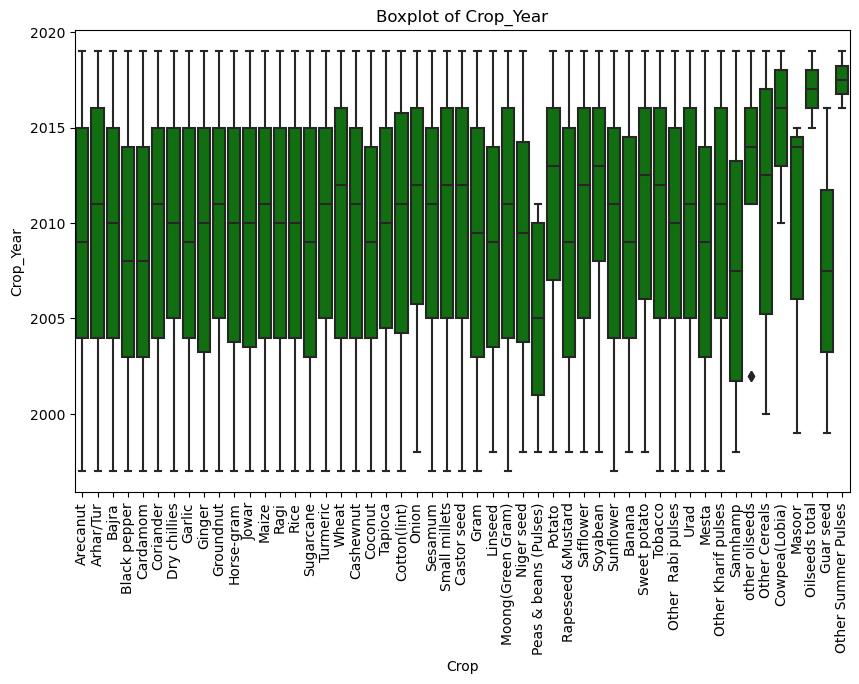

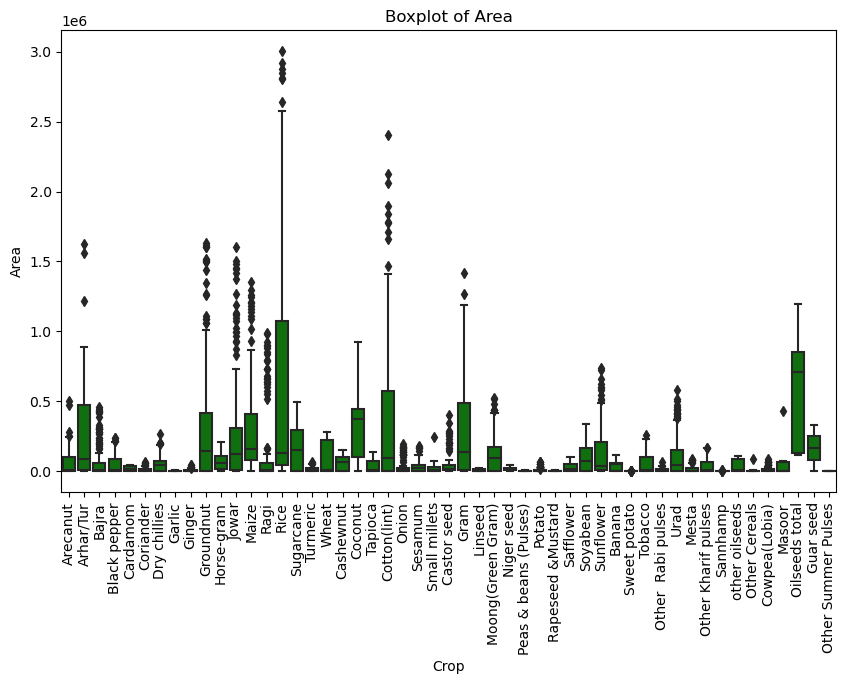

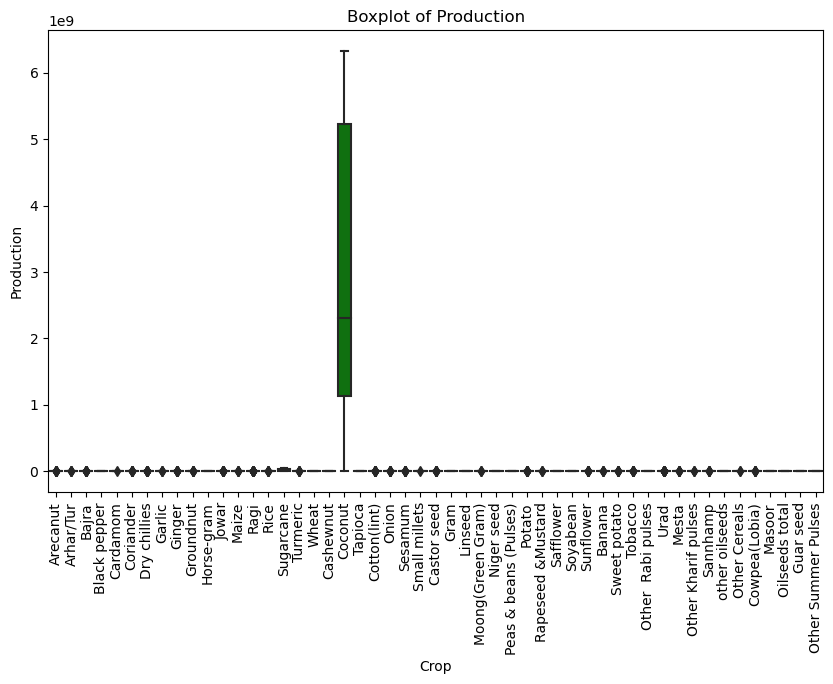

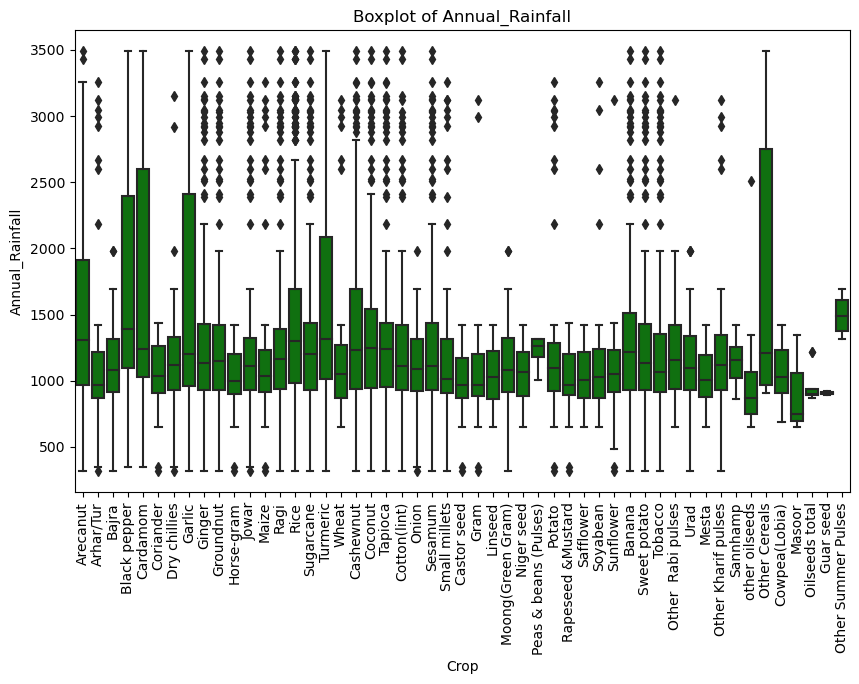

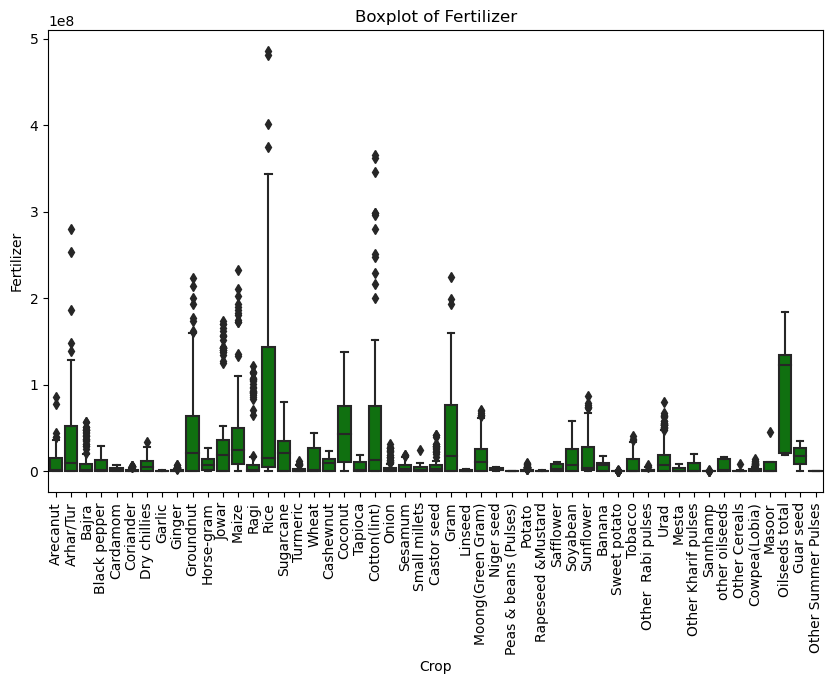

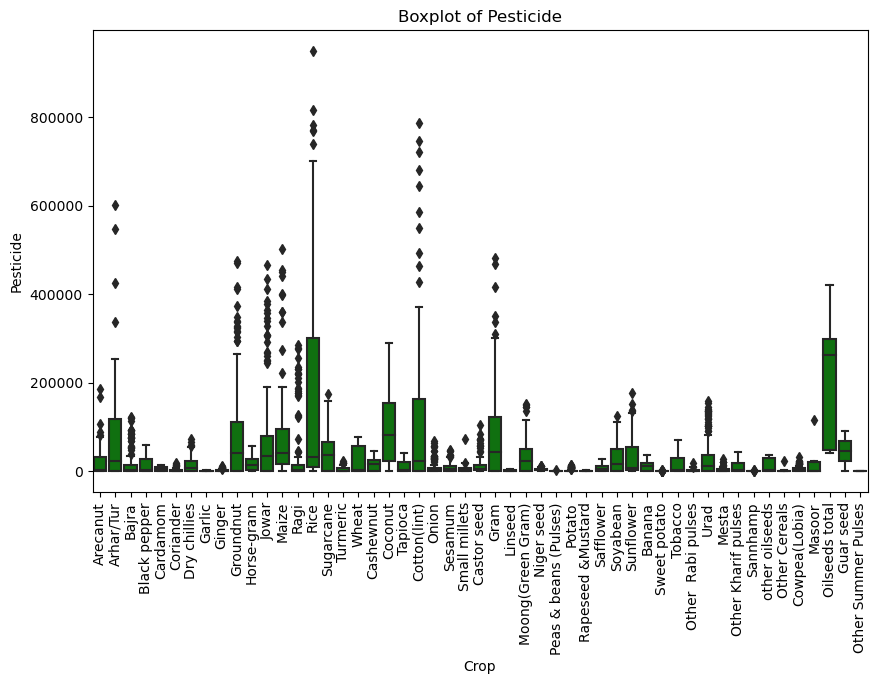

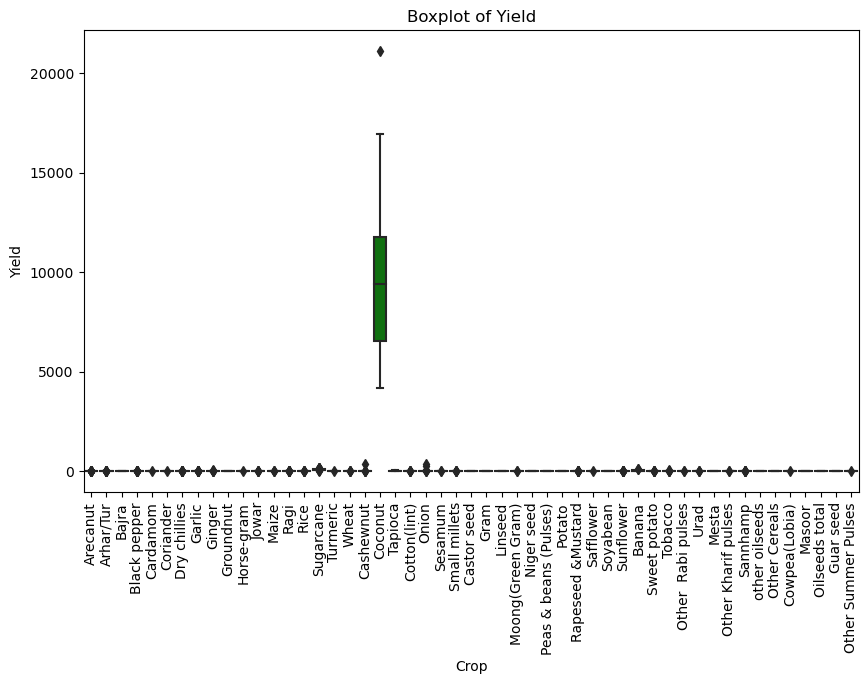

In [83]:
# Loop through each numeric column and create a boxplot
# Identify numeric columns in your DataFrame 'df2'
numeric_columns = df2.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x='Crop', y=column, data=df2,color='green')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [84]:
# AREA OUTLIERS
#Checking for outlier values whether it need to be clipped or not. Finding genuine outliers and pecentage of outliers.
def find_outliers(group):
    q1 = group['Area'].quantile(0.25)
    q3 = group['Area'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Area'] < lower_bound) | (group['Area'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
#print(outliers)
outliers
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 5.89%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,3.902358e+07,89124.00,10.121818
1,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,4.399802e+07,106194.42,10.920000
2,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,7.726851e+07,166732.30,9.040000
3,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,8.596966e+07,185193.14,10.772400
4,Arhar/Tur,2016,Kharif,Karnataka,1213836.0,1212287.0,1147.2,1.860204e+08,424842.60,0.686667
...,...,...,...,...,...,...,...,...,...,...
294,Urad,1998,Kharif,Tamil Nadu,446130.0,218245.0,1077.1,4.407764e+07,129377.70,0.505926
295,Urad,1999,Kharif,Tamil Nadu,439604.0,218071.0,922.8,4.665517e+07,118693.08,0.517778
296,Urad,2000,Kharif,Tamil Nadu,503982.0,244412.0,971.1,4.947591e+07,131035.32,0.517778
297,Urad,2007,Rabi,Andhra Pradesh,407000.0,201000.0,1004.2,5.429380e+07,65120.00,0.600000


In [85]:
# ANNUAL_RAINFALL OUTLIERS
#Checking for outlier values whether it need to be clipped or not. Finding genuine outliers and pecentage of outliers.
def find_outliers(group):
    q1 = group['Annual_Rainfall'].quantile(0.25)
    q3 = group['Annual_Rainfall'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Annual_Rainfall'] < lower_bound) | (group['Annual_Rainfall'] > upper_bound)]
    return outliers

outliers = df2.groupby('State').apply(find_outliers).reset_index(drop=True)
#print(outliers)
outliers
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 9.52%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2010,Whole Year,Andhra Pradesh,438.0,195.0,1297.0,7.275618e+04,105.12,0.443333
1,Arhar/Tur,2010,Kharif,Andhra Pradesh,629980.0,261286.0,1297.0,1.046460e+08,151195.20,0.466364
2,Arhar/Tur,2010,Rabi,Andhra Pradesh,8123.0,4101.0,1297.0,1.349312e+06,1949.52,0.483333
3,Bajra,2010,Kharif,Andhra Pradesh,51338.0,84908.0,1297.0,8.527755e+06,12321.12,1.229444
4,Bajra,2010,Rabi,Andhra Pradesh,15988.0,17254.0,1297.0,2.655767e+06,3837.12,1.454545
...,...,...,...,...,...,...,...,...,...,...
478,Rice,2012,Kharif,Tamil Nadu,1493276.0,4050334.0,706.8,2.251860e+08,462915.56,3.293226
479,Sesamum,2012,Whole Year,Tamil Nadu,33181.0,17179.0,706.8,5.003695e+06,10286.11,0.477241
480,Sugarcane,2012,Whole Year,Tamil Nadu,348379.0,34014097.0,706.8,5.253555e+07,107997.49,93.543548
481,Sunflower,2012,Kharif,Tamil Nadu,10782.0,11374.0,706.8,1.625926e+06,3342.42,1.136400


In [86]:
#FERTILIZER outliers
def find_outliers(group):
    q1 = group['Fertilizer'].quantile(0.25)
    q3 = group['Fertilizer'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Fertilizer'] < lower_bound) | (group['Fertilizer'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
#print(outliers)
outliers
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 5.54%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2015,Whole Year,Karnataka,247927.0,2430194.0,1024.9,39150152.57,81815.91,10.210476
1,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,39023580.00,89124.00,10.121818
2,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,43998024.96,106194.42,10.920000
3,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,77268511.60,166732.30,9.040000
4,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,85969658.72,185193.14,10.772400
...,...,...,...,...,...,...,...,...,...,...
276,Urad,2019,Rabi,Andhra Pradesh,287929.0,315055.0,899.2,49454685.04,106533.73,0.944615
277,Urad,2019,Rabi,Tamil Nadu,362726.0,281577.0,910.1,62301817.76,134208.62,0.759000
278,Urad,2000,Kharif,Tamil Nadu,503982.0,244412.0,971.1,49475912.94,131035.32,0.517778
279,Urad,2007,Rabi,Andhra Pradesh,407000.0,201000.0,1004.2,54293800.00,65120.00,0.600000


In [87]:
#PESTICIDE Outliers
def find_outliers(group):
    q1 = group['Pesticide'].quantile(0.25)
    q3 = group['Pesticide'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Pesticide'] < lower_bound) | (group['Pesticide'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 6.01%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2015,Whole Year,Karnataka,247927.0,2430194.0,1024.9,39150152.57,81815.91,10.210476
1,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,39023580.00,89124.00,10.121818
2,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,43998024.96,106194.42,10.920000
3,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,77268511.60,166732.30,9.040000
4,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,85969658.72,185193.14,10.772400
...,...,...,...,...,...,...,...,...,...,...
300,Urad,1998,Rabi,Andhra Pradesh,354800.0,230600.0,1048.3,35054240.00,102892.00,0.544118
301,Urad,1998,Kharif,Tamil Nadu,446130.0,218245.0,1077.1,44077644.00,129377.70,0.505926
302,Urad,1999,Kharif,Tamil Nadu,439604.0,218071.0,922.8,46655172.52,118693.08,0.517778
303,Urad,2000,Kharif,Tamil Nadu,503982.0,244412.0,971.1,49475912.94,131035.32,0.517778


In [88]:
#PRODUCTION Outliers
def find_outliers(group):
    q1 = group['Production'].quantile(0.25)
    q3 = group['Production'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Production'] < lower_bound) | (group['Production'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 6.43%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1998,Whole Year,Karnataka,98047.0,648365.0,1260.8,9687043.60,28433.63,6.232000
1,Arecanut,2005,Whole Year,Karnataka,161151.0,1033658.0,1316.2,19325227.92,33841.71,6.212381
2,Arecanut,2007,Whole Year,Karnataka,174404.0,1114484.0,1323.3,23265493.60,27904.64,6.211429
3,Arecanut,2008,Whole Year,Karnataka,184515.0,1174591.0,1164.1,26393025.60,16606.35,6.214286
4,Arecanut,2009,Whole Year,Karnataka,195802.0,1243385.0,1321.0,30509867.64,33286.34,6.210476
...,...,...,...,...,...,...,...,...,...,...
321,Urad,1999,Kharif,Tamil Nadu,439604.0,218071.0,922.8,46655172.52,118693.08,0.517778
322,Urad,2000,Kharif,Tamil Nadu,503982.0,244412.0,971.1,49475912.94,131035.32,0.517778
323,Urad,2004,Rabi,Andhra Pradesh,351048.0,223561.0,781.8,38032540.32,73720.08,0.608947
324,Urad,2007,Rabi,Andhra Pradesh,407000.0,201000.0,1004.2,54293800.00,65120.00,0.600000


In [89]:
#YIELD Outliers
def find_outliers(group):
    q1 = group['Yield'].quantile(0.25)
    q3 = group['Yield'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Yield'] < lower_bound) | (group['Yield'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 4.08%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1998,Whole Year,Karnataka,98047.0,648365.0,1260.8,9687043.60,28433.63,6.232000
1,Arecanut,2005,Whole Year,Karnataka,161151.0,1033658.0,1316.2,19325227.92,33841.71,6.212381
2,Arecanut,2007,Whole Year,Karnataka,174404.0,1114484.0,1323.3,23265493.60,27904.64,6.211429
3,Arecanut,2008,Whole Year,Karnataka,184515.0,1174591.0,1164.1,26393025.60,16606.35,6.214286
4,Arecanut,2009,Whole Year,Karnataka,195802.0,1243385.0,1321.0,30509867.64,33286.34,6.210476
...,...,...,...,...,...,...,...,...,...,...
202,Urad,2019,Rabi,Telangana,6816.0,12269.0,1031.7,1170716.16,2521.92,1.787692
203,Wheat,2014,Whole Year,Kerala,1.0,3.0,3046.4,150.96,0.33,3.000000
204,Wheat,2016,Rabi,Andhra Pradesh,33.0,76.0,890.0,5057.25,11.55,2.155000
205,Wheat,2019,Whole Year,Kerala,1.0,2.0,3119.2,171.76,0.37,2.000000


As per our research we found that the shown outliers could be genuine values. Therefore we are currently decided not to clip the values.
When Not to Clip Outliers

 1.Natural Variability: If outliers are natural variations in the data (e.g., rare but valid events), they should be kept to maintain the integrity of the dataset.
2. Small Sample Sizes: Removing outliers in small datasets can result in loss of
valuable information and lead to misleading conclusions.
3.Specific Analysis: For certain types of analysis, such as anomaly detection,
outliers are the primary focus and should not be removed.